# Pythonによるオブジェクト指向プログラミング


## クラスの定義

予約管理クラス`FacilityManager`，会議室予約管理クラス`RoomManager`を定義します．．


In [1]:
class FacilityManager:
    """ 予約管理クラス """
    
    def __init__(self, name = ""):
        """ コンストラクタ """
        print("FacilityManager.__init__()")
        self.name = name     # 属性: 施設名
        self.table = {}      # 属性: 予約表
        
    def reserve(self, when, who):
        """ 予約メソッド """
        print("FacilityManager.reserve()")
        if self.isreserved(when):
            return False
        else:
            self.table[when] = who
            return True
    
    def cancel(self, when):
        """ 取り消しメソッド """
        print("FacilityManager.cancel()")
        if self.isreserved(when):
            del self.table[when]
    
    def isreserved(self, when):
        """ 照会メソッド """
        print("FacilityManager.isreserved()")
        return (when in self.table)
    
    def gettable(self):
        """ 予約表取得メソッド """
        print("FacilityManager.gettable()")
        return self.table

class RoomManager(FacilityManager):
    """ 会議室予約管理クラス """
    
    def __init__(self, name, room_number):
        print("RoomManager.__init__()")
        super().__init__(name)   # 親クラスのコンストラクタを呼び出す
        self.room_number = room_number

    def getroomnumber(self):
        print("RoomManager.getroomnumber()")
        return self.room_number

## クラスとインスタンス

予約管理`FacilityManager`クラスのインスタンスを生成してみましょう．

In [6]:
# FacilityManagerクラスのインスタンスを生成する
a1 = FacilityManager("施設1")

FacilityManager.__init__()


コンストラクタ`FacilityManager.__init__()`が自動的に実行されることが確認できます．

オブジェクト`a1`の予約管理メソッド`reserve()`, 予約表取得メソッド`gettable()`を呼び出してみましょう．

In [7]:
# reserveメソッドを呼び出す（メッセージ送信する)
a1.reserve("2019/10/10", "Taniguchi")
a1.reserve("2019/10/11", "Furuta")
print(a1.gettable())

FacilityManager.reserve()
FacilityManager.isreserved()
FacilityManager.reserve()
FacilityManager.isreserved()
FacilityManager.gettable()
{'2019/10/10': 'Taniguchi', '2019/10/11': 'Furuta'}


ちゃんと，クラス（ひな形）に定義しておい`FacilityManager.reserve()`メソッドが呼び出され，予約表に予約内容が記録されていることが分かります．それでは，オブジェクト`a1`の取り消しメソッド`cancel()`を呼び出してみます．

In [8]:
""" cancelメソッドを呼び出す """
print(a1.gettable())
a1.cancel("2019/10/10")
print(a1.table)     # 属性はdefaultでpublicなので外からも参照できる

FacilityManager.gettable()
{'2019/10/10': 'Taniguchi', '2019/10/11': 'Furuta'}
FacilityManager.cancel()
FacilityManager.isreserved()
{'2019/10/11': 'Furuta'}


もう一つインスタンスを作って，予約管理メソッドを呼び出してみよう．クラス`FacilityManager()`にインスタンス固有の値，この場合は`name`を指定するだけでインスタンスを量産できます．

In [9]:
a2 = FacilityManager("施設2")
print(a1.name, "の予約: ", a1.reserve("2019/10/11", "Furuta"))
print(a2.name, "の予約: ", a2.reserve("2019/10/11", "Furuta"))

FacilityManager.__init__()
FacilityManager.reserve()
FacilityManager.isreserved()
施設1 の予約:  False
FacilityManager.reserve()
FacilityManager.isreserved()
施設2 の予約:  True


二つのインスタンス`a1`, `a2`でメソッドは共有されていますが，属性値は別の値が設定されていることが確認できました．

## クラスの継承（インヘリタンス）

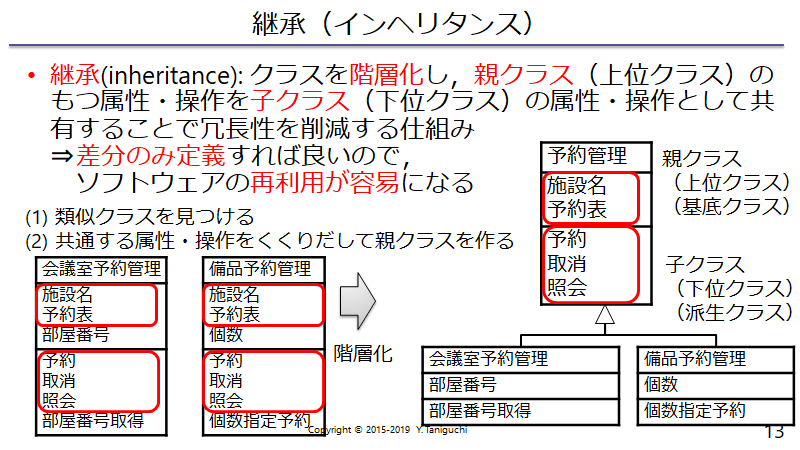

`FacilityManger`クラスを継承して定義されている会議室予約管理クラス`RoomManager`のインスタンスを作成してみましょう．

In [10]:
b = RoomManager("会議室1", 101)

RoomManager.__init__()
FacilityManager.__init__()


`RoomManager`クラスのコンストラクタ`RoomManager.__init__()`の先頭行`super().__init__(name)`は，親クラス(super class)の`__init__()`を呼び出しています．

次に`reserve()`, `getroomnumber()`, `gettable()`を呼び出してみよう．

In [11]:
b.reserve("2019/10/12", "Furuta")
print(b.getroomnumber())
print(b.gettable())

FacilityManager.reserve()
FacilityManager.isreserved()
RoomManager.getroomnumber()
101
FacilityManager.gettable()
{'2019/10/12': 'Furuta'}


`RoomManager`クラスで定義していない`reserve()`, `gettable()`メソッドは，親クラス`FacilityManager`クラスで定義されたメソッドが自動的に呼び出されることが分かります．つまり，親クラス`FacilityManager`と`RoomManager`で属性，メソッドが共有されています．差分のみを定義すれば良いので，ソフトウェアの再利用が容易になります．

試しに，`FacilityManager`クラスのオブジェクト`a`に`getroomnumber()`メソッドを呼び出してみると，当然ですがエラーになります．

In [12]:
a.getroomnumber()

NameError: name 'a' is not defined

## <練習問題> クラスの継承
設備予約管理クラス`FacilityManager`を継承して，備品予約管理クラス`EquipmentManager`を作成しなさい．`EquipmentManager`はプロジェクタ，CDプレーヤのように移動可能な備品を管理するクラスで，会議室クラスと違って，1人で同時に複数個の備品を予約できる．
* `EquipmentManger.reserve()`メソッドを新しく作成する．`EquipmentManager.reserve(self, when, who, num)`は`self`を除いて三つの引数をとる．`when`は予約日，`who`は予約者，`num`は予約備品数である．
* 予約表`self.table`は辞書型の属性であり，`when`をキーとして，タプル`(who, num)`を値として保持することにする．つまり，`EquipmentManager.reserve("2019/10/10", "Taniguchi", 2)`を呼び出すと，`self.table`に`"2019/10/10":("Taniguchi", 2)`が挿入される．これで`2019/10/10`に`Taniguchi`が2台の備品を予約したことになる．
* `reserve()`以外のメソッドは`FacilityManager`クラスをすべて継承する．

In [16]:
class EquipmentManager(FacilityManager):
    
    def __init__(self):
        
        super(EquipmentManager, self).__init__()
        
        
    def reserve(self, when: str, who: str, num: int):
        
        self.table[when] = (who, num,)
        print(self.table)


em = EquipmentManager()
em.reserve("2019/10/10", "Taniguchi", 2)

FacilityManager.__init__()
{'2019/10/10': ('Taniguchi', 2)}


In [ ]:
c = EquipmentManager("プロジェクタ")
c.reserve("2019/10/10", "Taniguchi", 2)
print(c.gettable())